In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_USA = pd.read_csv("US_Accidents.csv")

<ipython-input-6-ae74a0476664>:1: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_USA = pd.read_csv("US_Accidents.csv")


In [7]:
df_USA.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3.0,08-02-2016 00:37,08-02-2016 06:37,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2.0,08-02-2016 05:56,08-02-2016 11:56,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2.0,08-02-2016 06:15,08-02-2016 12:15,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2.0,08-02-2016 06:15,08-02-2016 12:15,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2.0,08-02-2016 06:51,08-02-2016 12:51,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [8]:
df_USA.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [9]:
df_USA.dtypes.value_counts()

,count
object,33
float64,14


Shape of original data

In [10]:
df_USA.shape

(27603, 47)

In [11]:
df_USA.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,27602.000000,27602.000000,27602.000000,27602.000000,27602.000000,27602.000000,4241.000000,26773.000000,4171.000000,26753.000000,26812.000000,26738.000000,23236.000000,2396.000000
mean,2.319071,35.783371,-104.760238,35.783574,-104.760183,0.683348,8398.783542,61.657360,23.117933,64.152357,29.997859,9.316295,9.432278,0.038760
std,0.584231,4.380195,12.512205,4.380350,12.512380,1.917844,11946.898128,18.470687,18.177099,21.428379,0.252210,3.010147,8.920355,0.098908
min,2.000000,26.218240,-123.526160,26.209870,-123.526160,0.000000,1.000000,-18.000000,-34.700000,4.000000,20.670000,0.000000,0.000000,0.000000
25%,2.000000,32.813720,-118.170333,32.814647,-118.170530,0.173000,1703.000000,54.000000,11.100000,49.000000,29.900000,10.000000,5.800000,0.000000
50%,2.000000,34.119070,-97.127400,34.119630,-97.123100,0.411000,4901.000000,64.400000,24.600000,65.000000,29.990000,10.000000,8.100000,0.000000
75%,3.000000,38.744262,-95.149970,38.743810,-95.150320,0.678000,11167.000000,73.400000,34.800000,81.000000,30.100000,10.000000,11.500000,0.030000
max,4.000000,48.125360,-80.005270,48.122370,-79.958150,151.525000,330991.000000,129.200000,101.000000,100.000000,30.920000,70.000000,822.800000,1.120000


In [12]:
df_USA.State.unique

<bound method Series.unique of 0         OH
1         OH
2         OH
3         OH
4         OH
        ... 
27598     LA
27599     TX
27600     TX
27601     TX
27602    NaN
Name: State, Length: 27603, dtype: object>

In [13]:
df1=df_USA[df_USA['State']=='CA']

In [14]:
df1['IDD'] = df1['ID'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

<ipython-input-14-aae0ba6fa09f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['IDD'] = df1['ID'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)


In [15]:
df1

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,IDD
1012,A-2717612,3.0,22-03-2016 18:53,23-03-2016 00:53,38.825840,-120.029214,38.827194,-120.030632,0.121,Between Twin Bridges Tract and South Lake Taho...,...,False,False,False,False,False,Day,Day,Day,Day,2717612
1013,A-2717613,2.0,22-03-2016 19:00,23-03-2016 01:00,37.358209,-121.840017,37.361596,-121.842044,0.259,Between Capitol Expy and Alum Rock Ave - Accid...,...,False,False,False,False,False,Day,Day,Day,Day,2717613
1014,A-2717614,3.0,22-03-2016 20:07,23-03-2016 02:07,37.881943,-122.307987,37.885882,-122.308878,0.276,At I-80/I-580 Northern Split - Accident.,...,False,False,False,False,False,Night,Night,Day,Day,2717614
1015,A-2717615,2.0,22-03-2016 21:40,23-03-2016 03:40,37.881038,-122.307788,37.883458,-122.308366,0.170,At I-80/I-580 Northern Split - Accident.,...,False,False,False,False,False,Night,Night,Night,Night,2717615
1016,A-2717616,2.0,22-03-2016 21:36,23-03-2016 03:36,38.518811,-121.101664,38.518811,-121.101664,0.000,Between Latrobe Rd/Indio Dr and Latrobe Rd - A...,...,False,False,False,False,False,Night,Night,Night,Night,2717616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12115,A-2728715,4.0,20-06-2016 11:44,20-06-2016 18:44,34.178860,-117.882090,34.239110,-117.851310,4.519,Closed between Silverfish and Glendora - Road ...,...,False,False,False,False,False,Day,Day,Day,Day,2728715
12116,A-2728716,4.0,20-06-2016 11:44,20-06-2016 18:44,34.239110,-117.851310,34.178860,-117.882090,4.519,Closed between Glendora and Silverfish - Road ...,...,False,False,False,False,False,Day,Day,Day,Day,2728716
12117,A-2728717,2.0,20-06-2016 14:35,20-06-2016 20:35,34.145390,-118.368710,34.143994,-118.367857,0.108,At Lankershim Blvd/Exit 12A - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,2728717
12118,A-2728718,2.0,20-06-2016 14:44,20-06-2016 20:44,34.155740,-118.289767,34.154406,-118.288097,0.133,At CA-134/Ventura Fwy - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,2728718


In [16]:
df1.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,IDD
1012,A-2717612,3.0,22-03-2016 18:53,23-03-2016 00:53,38.825840,-120.029214,38.827194,-120.030632,0.121,Between Twin Bridges Tract and South Lake Taho...,...,False,False,False,False,False,Day,Day,Day,Day,2717612
1013,A-2717613,2.0,22-03-2016 19:00,23-03-2016 01:00,37.358209,-121.840017,37.361596,-121.842044,0.259,Between Capitol Expy and Alum Rock Ave - Accid...,...,False,False,False,False,False,Day,Day,Day,Day,2717613
1014,A-2717614,3.0,22-03-2016 20:07,23-03-2016 02:07,37.881943,-122.307987,37.885882,-122.308878,0.276,At I-80/I-580 Northern Split - Accident.,...,False,False,False,False,False,Night,Night,Day,Day,2717614
1015,A-2717615,2.0,22-03-2016 21:40,23-03-2016 03:40,37.881038,-122.307788,37.883458,-122.308366,0.170,At I-80/I-580 Northern Split - Accident.,...,False,False,False,False,False,Night,Night,Night,Night,2717615
1016,A-2717616,2.0,22-03-2016 21:36,23-03-2016 03:36,38.518811,-121.101664,38.518811,-121.101664,0.000,Between Latrobe Rd/Indio Dr and Latrobe Rd - A...,...,False,False,False,False,False,Night,Night,Night,Night,2717616


In [17]:
df1.shape

(11104, 48)

In [18]:
df1.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'IDD'],
      dtype='object')

In [19]:
df1.duplicated().sum()

0

In [20]:
d1f=df1.dropna(subset=['Precipitation(in)'])

In [21]:
df1.shape

(11104, 48)

In [22]:
df1=df1.dropna(subset=['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction', 'Wind_Speed(mph)',
                      'Weather_Condition'])

In [23]:
df1.shape

(182, 48)

In [24]:
df1.isna().sum()/len(df1)*100

,0
ID,0.000000
Severity,0.000000
Start_Time,0.000000
End_Time,0.000000
Start_Lat,0.000000
Start_Lng,0.000000
End_Lat,0.000000
End_Lng,0.000000
Distance(mi),0.000000
Description,0.000000


In [25]:
df1=df1.dropna(subset=['City','Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'])

In [26]:
df1.isna().sum()/len(df1)*100

,0
ID,0.000000
Severity,0.000000
Start_Time,0.000000
End_Time,0.000000
Start_Lat,0.000000
Start_Lng,0.000000
End_Lat,0.000000
End_Lng,0.000000
Distance(mi),0.000000
Description,0.000000


In [27]:
df1['Weather_Condition'].value_counts()

,count
Weather_Condition,
Fair,68
Partly Cloudy,30
Clear,25
Mostly Cloudy,20
Cloudy,16
Haze,9
Snow,5
Overcast,3
Light Snow,2


In [28]:
df1.Side.unique()

array(['R', 'L'], dtype=object)

In [29]:
df_cat=df1.select_dtypes('object')
df_num=df1.select_dtypes(np.number)
df_cat=df_cat.drop('ID',axis=1)

In [30]:
df_cat=df1.select_dtypes('object')
col_name=[]
length=[]

for i in df_cat.columns:
    col_name.append(i)
    length.append(len(df_cat[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,ID,182
1,Start_Time,168
2,End_Time,168
3,Description,132
4,Street,63
5,Side,2
6,City,48
7,County,23
8,State,1
9,Zipcode,66


In [31]:
df1.drop(['Description','Zipcode','Weather_Timestamp'],axis=1,inplace=True)

In [32]:
del df1['Airport_Code']

In [33]:
df_num.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'IDD'],
      dtype='object')

In [34]:
len(df_num.columns)

15

In [35]:
df_cat.columns

Index(['ID', 'Start_Time', 'End_Time', 'Description', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [37]:
len(df_USA['City'].unique())
len(df1['City'].unique())

48

Numeric Data

In [38]:
df_num=df1.select_dtypes(np.number)
col_name=[]
length=[]

for i in df_num.columns:
    col_name.append(i)
    length.append(len(df_num[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,Severity,3
1,Start_Lat,148
2,Start_Lng,149
3,End_Lat,149
4,End_Lng,150
5,Distance(mi),135
6,Number,40
7,Temperature(F),60
8,Wind_Chill(F),73
9,Humidity(%),68


<Axes: >

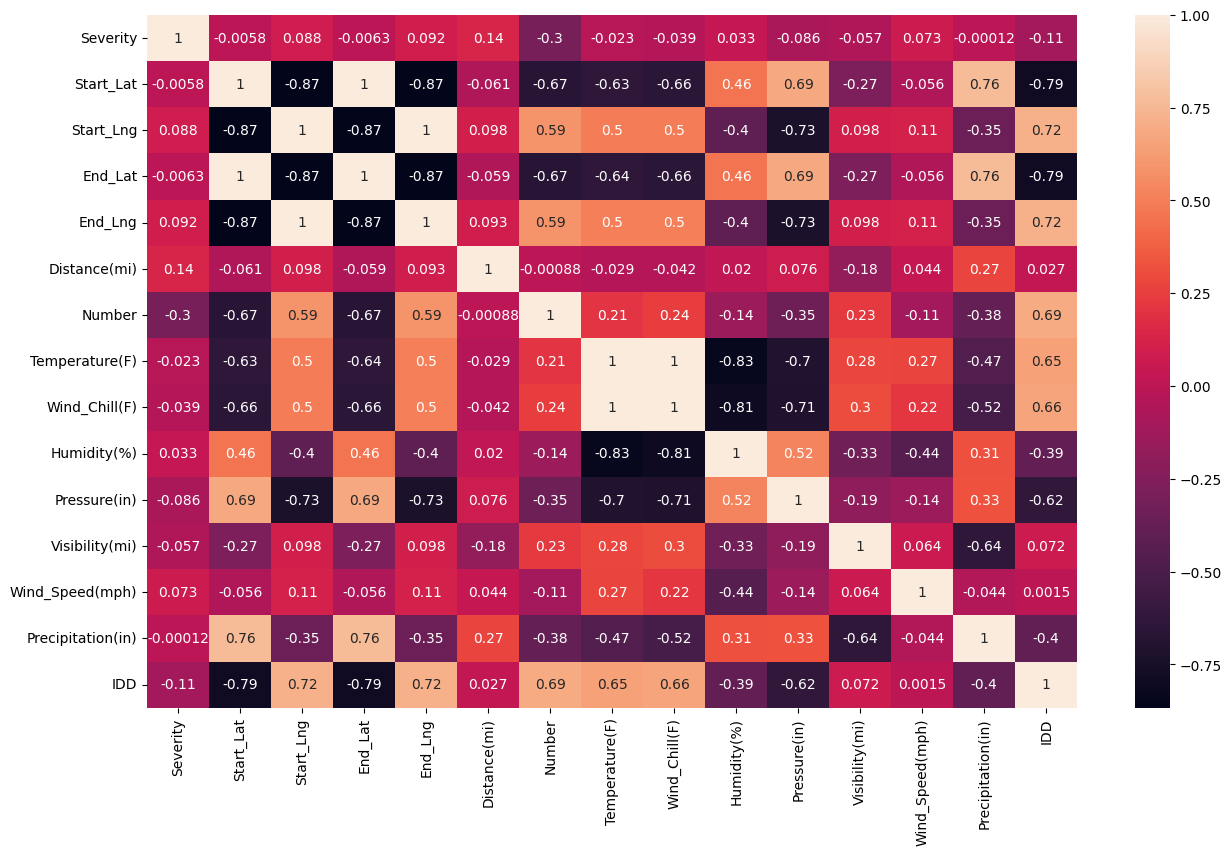

In [39]:
plt.figure(figsize=(15 ,9))
sns.heatmap(df_num.corr() , annot=True)

In [40]:
cities = df1['City'].unique()
len(cities)

48

In [41]:
accidents_by_cities = df1['City'].value_counts()
accidents_by_cities

,count
City,
Newhall,27
Castaic,18
Valencia,17
Canyon Country,17
Beaumont,12
Santa Clarita,11
Simi Valley,9
Sacramento,8
Porter Ranch,6


In [42]:
accidents_by_cities[:10]

,count
City,
Newhall,27
Castaic,18
Valencia,17
Canyon Country,17
Beaumont,12
Santa Clarita,11
Simi Valley,9
Sacramento,8
Porter Ranch,6


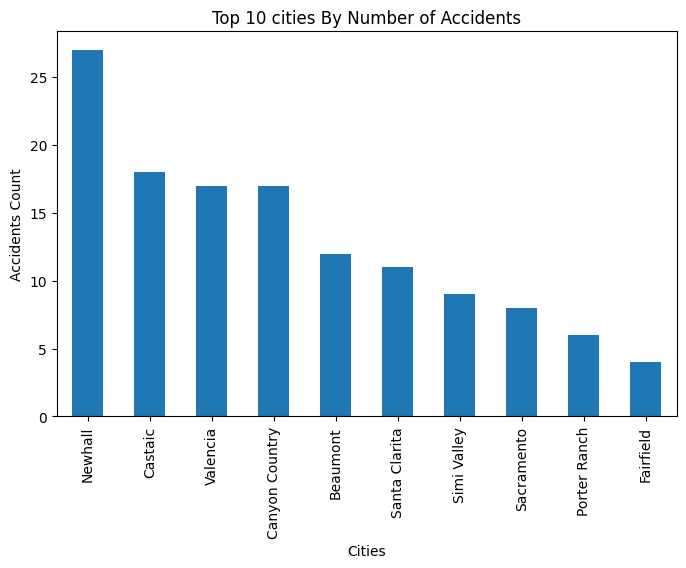

In [43]:
fig, ax = plt.subplots(figsize=(8,5))
accidents_by_cities[:10].plot(kind='bar')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

In [44]:
accidents_severity = df1.groupby('Severity').count()['ID']
accidents_severity

,ID
Severity,
2.0,146
3.0,25
4.0,11


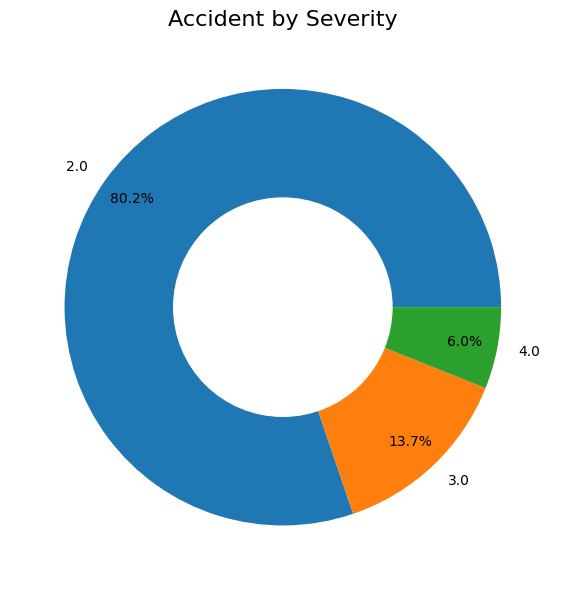

In [47]:
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
labels = accidents_severity.index
plt.pie(accidents_severity, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident by Severity",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

In [48]:
df1['Start_Time'].dtypes

dtype('O')

In [49]:
df1['End_Time'].dtypes

dtype('O')

In [50]:
df1 = df1.astype({'Start_Time': 'datetime64[ns]', 'End_Time': 'datetime64[ns]'})
df1['Start_Time'].dtypes

dtype('<M8[ns]')

In [56]:
df1['Start_Time'].iloc[0]
df1 = df1.reset_index(drop=True)
df1['Start_Time'][0]
df1['Start_Time'].iloc[-1]

Timestamp('2016-06-17 15:01:00')

In [59]:
df1['End_Time'].iloc[0]
df1 = df1.reset_index(drop=True)
df1['End_Time'][0]
df1['End_Time'].iloc[-1]

Timestamp('2016-06-17 21:01:00')

In [60]:
df1['start_date'] = [d.date() for d in df1['Start_Time']]
df1['start_time'] = [d.time() for d in df1['Start_Time']]

In [61]:
df1['end_date'] = [d.date() for d in df1['End_Time']]
df1['end_time'] = [d.time() for d in df1['End_Time']]

In [62]:
df1['end_time']

,end_time
0,09:48:00
1,10:52:00
2,12:29:00
3,12:41:00
4,03:48:00
...,...
177,21:17:00
178,17:54:00
179,19:02:00
180,19:39:00


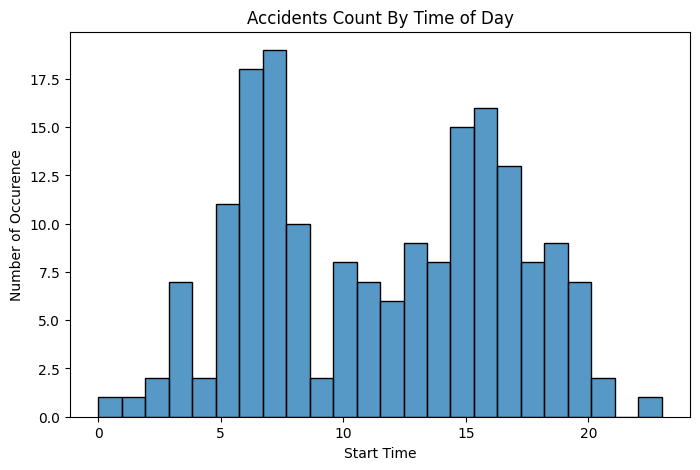

In [63]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df1['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

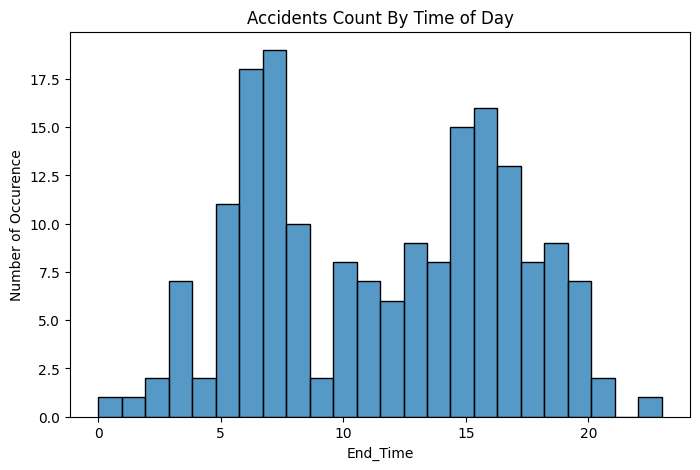

In [64]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df1['Start_Time'].dt.hour, bins = 24)

plt.xlabel("End_Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

In [65]:
del df1['Start_Time']
del df1['End_Time']

In [66]:
%matplotlib inline
import os

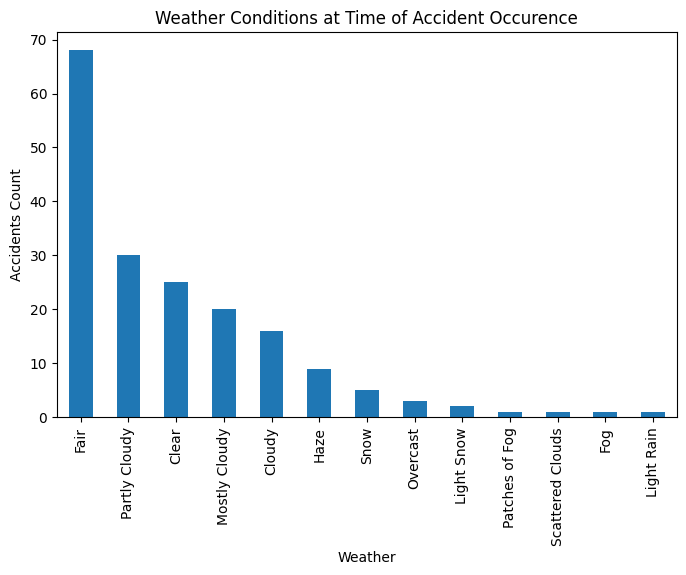

In [68]:
fig, ax = plt.subplots(figsize=(8,5))
# Calculate the frequency of each unique value in the 'Weather_Condition' column
weather_conditions = df1['Weather_Condition'].value_counts()
# Sort the values in descending order and select the top 20
weather_conditions.sort_values(ascending=False)[:20].plot(kind='bar')
ax.set(title = 'Weather Conditions at Time of Accident Occurence',
       xlabel = 'Weather',
       ylabel = 'Accidents Count')
plt.show()

most accidents happened when the weather was 'fair'. Perhaps weather (bad weather) was not a big contributing factor to accidents.

In [70]:
df1.shape

(182, 46)

In [71]:
df_num.shape

(182, 15)

In [72]:
df1.groupby('Severity').count()['IDD']

,IDD
Severity,
2.0,146
3.0,25
4.0,11


<Axes: xlabel='Severity', ylabel='Start_Lat'>

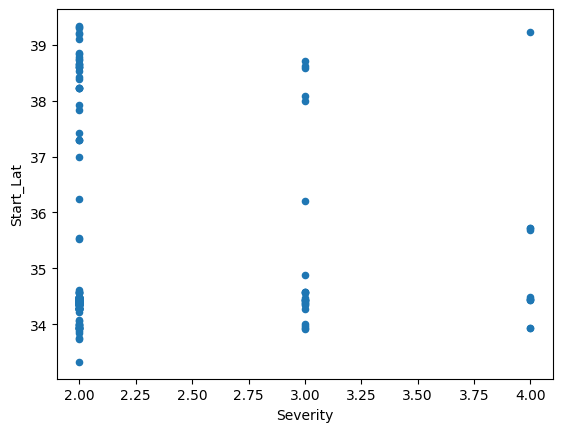

In [73]:
df_num.plot(kind='scatter', y='Start_Lat', x='Severity')

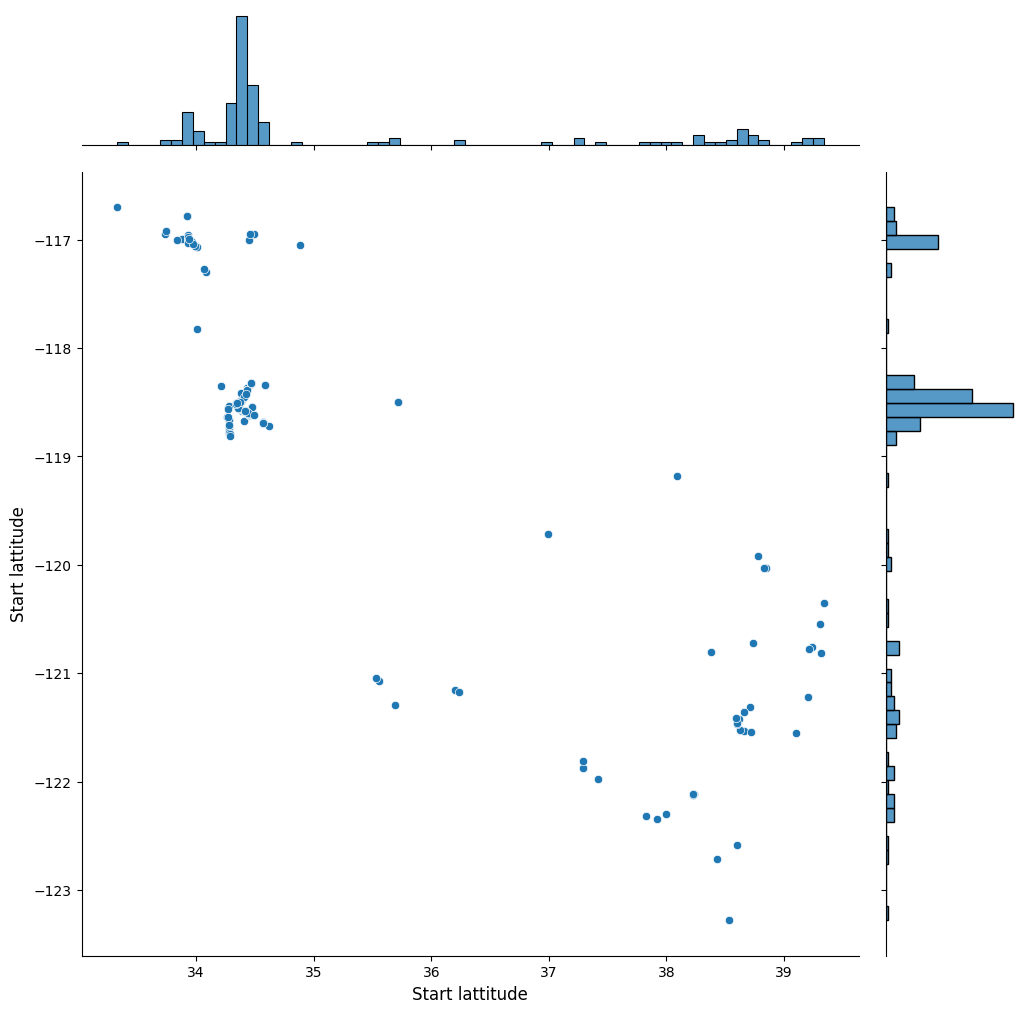

In [74]:
sns.jointplot(x=df_num.Start_Lat.values , y=df_num.Start_Lng.values,height=10)
plt.ylabel('Start lattitude', fontsize=12)
plt.xlabel('Start lattitude', fontsize=12)
plt.show()

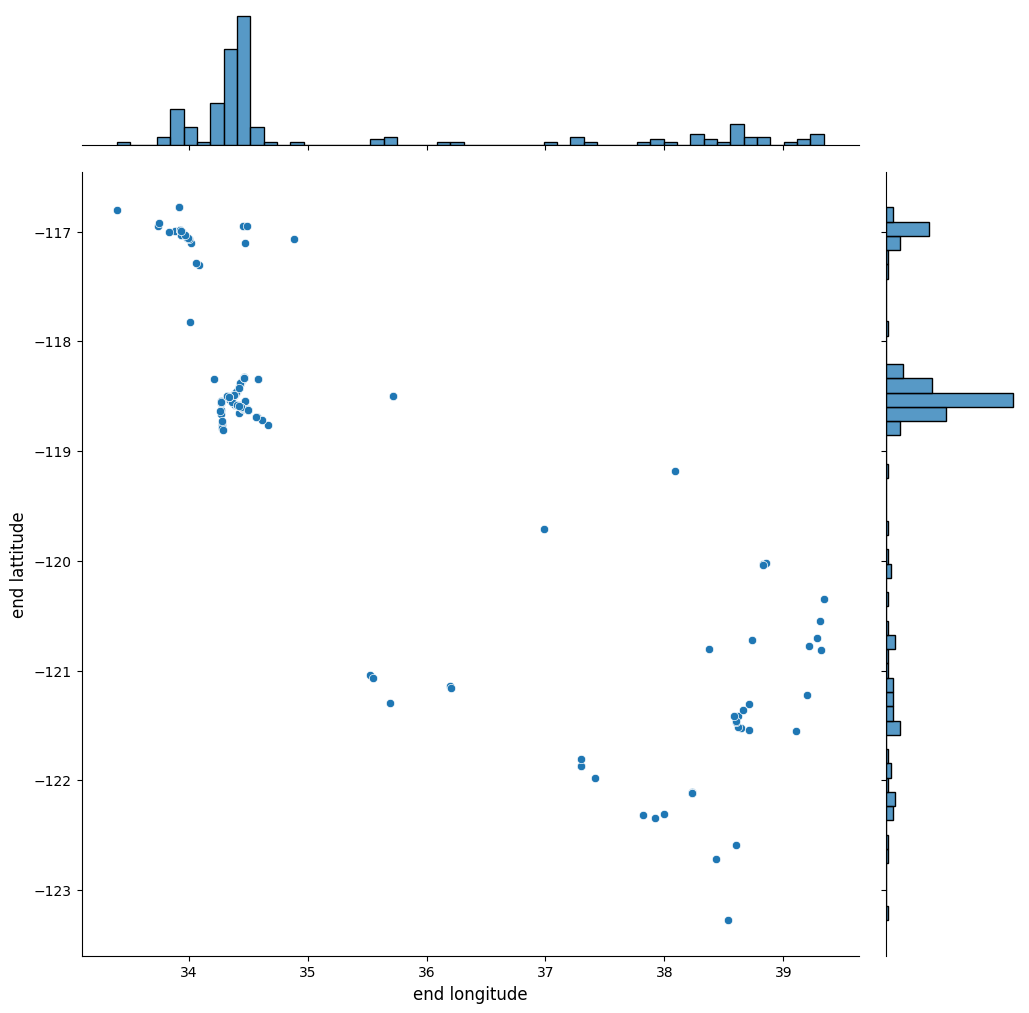

In [75]:
sns.jointplot(x=df_num.End_Lat.values , y=df_num.End_Lng.values,height=10)
plt.ylabel('end lattitude', fontsize=12)
plt.xlabel('end longitude', fontsize=12)
plt.show()